In [ ]:
#!pip install tensorflow-gpu==2.0.0-rc0
# Keep your eyes for update: https://www.tensorflow.org/

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.11.0


In [ ]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/card_transdata.csv')
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
data.shape

(1000000, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
data['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

<BarContainer object of 1 artists>

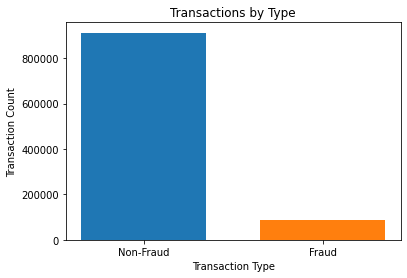

In [ ]:
data[data["fraud"] == 1].fraud.count()
f_count = data[data["fraud"] == 1]["fraud"].count()
nf_count = data[data["fraud"] == 0]["fraud"].count()
categories = ["Non-Fraud", "Fraud"]
xpos = np.array([0, 1])
plt.xticks(xpos, categories)
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Count")
plt.title("Transactions by Type")
plt.bar(xpos[0], nf_count, width= 0.7)
plt.bar(xpos[1], f_count, width = 0.7)

In [ ]:
X = data.drop('fraud', axis = 1)
y = data['fraud']

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority',random_state = 0 )
X_sam,y_sam = sm.fit_resample(X,y)
df_sam = pd.concat([pd.DataFrame(X_sam) , pd.DataFrame(y_sam)] , axis = 1)

In [ ]:
df_sam['fraud'].value_counts()

0.0    912597
1.0    912597
Name: fraud, dtype: int64

In [ ]:
##Divide Test & Train
X_train, X_test, y_train, y_test = train_test_split(X_sam, y_sam, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((1460155, 7), (365039, 7))

In [ ]:
y_train.shape, y_test.shape

((1460155,), (365039,))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
y_train.shape

(1460155,)

In [ ]:
X_train.shape

(1460155, 7)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
####    Logistic Regression    #####

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94157


In [ ]:
## K Fold Cross Validation for Logistic Regression ##
from sklearn.model_selection import KFold
kfold_validation=KFold(10)

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(logreg,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.95701 0.95822 0.95707 0.95951 0.95822 0.95717 0.95682 0.95887 0.95783
 0.95724]
0.9577960000000001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print(confusion_matrix_logreg)

[[170670  12247]
 [  9083 173039]]


Text(87.0, 0.5, 'Reality')

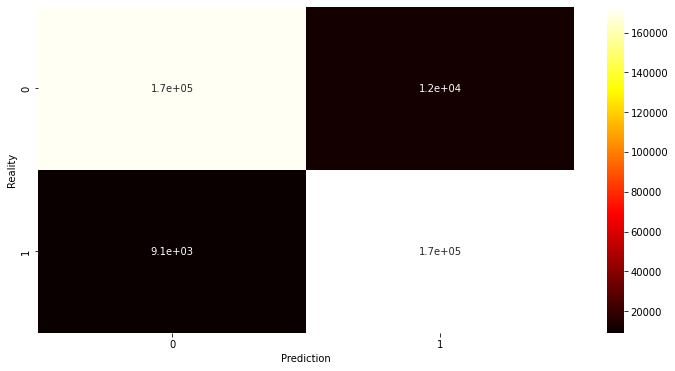

In [ ]:
plt.figure(figsize = (12, 6))

sns.heatmap(confusion_matrix_logreg, annot = True, cmap = "hot")
plt.xlabel("Prediction")
plt.ylabel("Reality")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg, digits=6))

              precision    recall  f1-score   support

         0.0   0.949470  0.933046  0.941186    182917
         1.0   0.933902  0.950127  0.941945    182122

    accuracy                       0.941568    365039
   macro avg   0.941686  0.941586  0.941565    365039
weighted avg   0.941703  0.941568  0.941565    365039



In [ ]:
####  SHAP for Logistic Regression   #####

In [ ]:
from IPython.display import clear_output
!pip install shap
clear_output()

In [ ]:
feature_names=list(X.columns)

In [ ]:
import shap
lr_explainer = shap.KernelExplainer(logreg.predict,shap.sample(X_test, 5))
lr_shap_values = lr_explainer.shap_values(X_test)

  0%|          | 0/365039 [00:00<?, ?it/s]

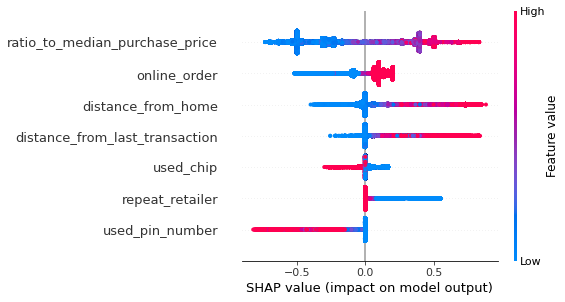

In [ ]:
shap.summary_plot(lr_shap_values, X_test,feature_names)

In [ ]:
####   Naive Bayes   ###########

In [ ]:
from sklearn.naive_bayes import GaussianNB
from prettytable import PrettyTable
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_test_pred = nb_model.predict(X_test)
print('Accuracy of Naive Bayes classifier on test set: {:.5f}'.format(nb_model.score(X_test, y_test)))

Accuracy of Naive Bayes classifier on test set: 0.78471


In [ ]:
## K Fold Cross Validation for Naive Bayes ##
from sklearn.model_selection import KFold
kfold_validation=KFold(10)

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(nb_model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.95101 0.95053 0.95105 0.95088 0.9484  0.95045 0.95094 0.95176 0.94974
 0.95096]
0.950572


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_nb_model = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_nb_model)

[[110823  72094]
 [  6494 175628]]


Text(87.0, 0.5, 'Reality')

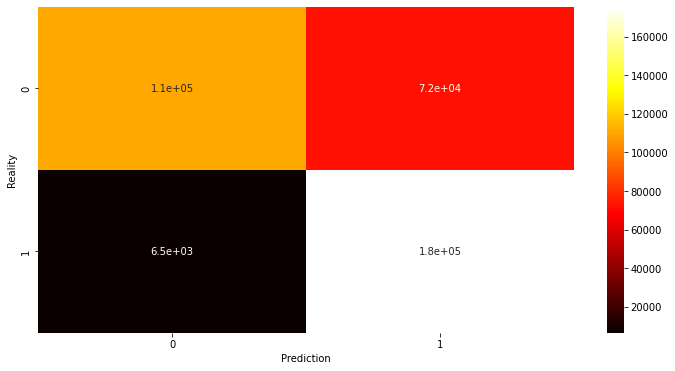

In [ ]:
plt.figure(figsize = (12, 6))

sns.heatmap(confusion_matrix_nb_model, annot = True, cmap = "hot")
plt.xlabel("Prediction")
plt.ylabel("Reality")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, digits=6))

              precision    recall  f1-score   support

         0.0   0.944646  0.605865  0.738244    182917
         1.0   0.708972  0.964343  0.817171    182122

    accuracy                       0.784713    365039
   macro avg   0.826809  0.785104  0.777708    365039
weighted avg   0.827066  0.784713  0.777622    365039



In [ ]:
####  SHAP for Naive Bayes   #####

In [ ]:
from IPython.display import clear_output
!pip install shap
clear_output()

In [ ]:
feature_names=list(X.columns)

In [ ]:
import shap
nb_explainer = shap.KernelExplainer(nb_model.predict,shap.sample(X_test, 5))
nb_shap_values = nb_explainer.shap_values(X_test)

  0%|          | 0/365039 [00:00<?, ?it/s]

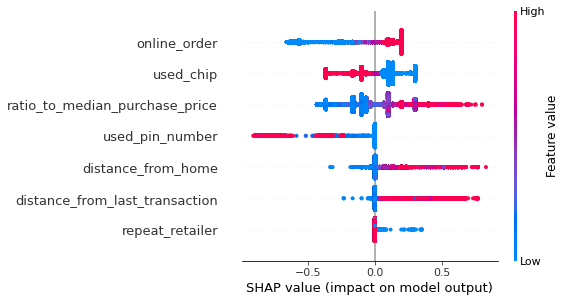

In [ ]:
shap.summary_plot(nb_shap_values, X_test,feature_names)

In [ ]:
####   SVM   #####

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.5f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.99542


In [ ]:
## K Fold Cross Validation for Logistic Regression ##
from sklearn.model_selection import KFold
kfold_validation=KFold(10)

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(svm,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_svm_model = confusion_matrix(y_test, y_pred_svm)
print(confusion_matrix_svm_model)

[[181389   1528]
 [   143 181979]]


Text(87.0, 0.5, 'Reality')

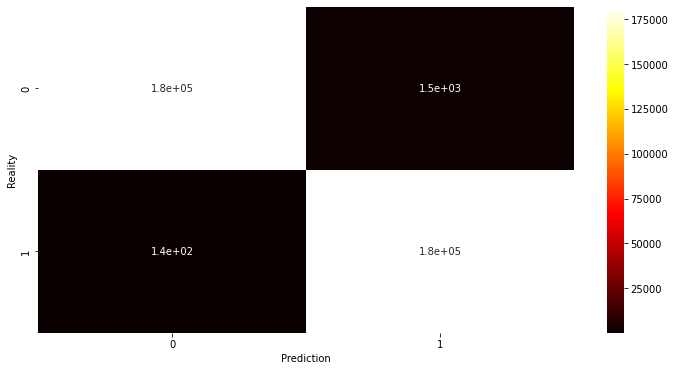

In [ ]:
plt.figure(figsize = (12, 6))

sns.heatmap(confusion_matrix_svm_model, annot = True, cmap = "hot")
plt.xlabel("Prediction")
plt.ylabel("Reality")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm, digits=6))

              precision    recall  f1-score   support

         0.0   0.999212  0.991646  0.995415    182917
         1.0   0.991673  0.999215  0.995430    182122

    accuracy                       0.995422    365039
   macro avg   0.995443  0.995431  0.995422    365039
weighted avg   0.995451  0.995422  0.995422    365039



In [ ]:
####  SHAP for SVM   #####

In [ ]:
from IPython.display import clear_output
!pip install shap
clear_output()

In [ ]:
feature_names=list(X.columns)

In [ ]:
import shap
svm_explainer = shap.KernelExplainer(svm.predict,shap.sample(X_test, 5))
svm_shap_values = svm_explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(svm_shap_values, X_test,feature_names)

In [ ]:
####    XGBoost     ####

In [ ]:
# Importing XGBoost
from xgboost import XGBClassifier

In [ ]:
xgb_imb_model = XGBClassifier()
xgb_imb_model.fit(X_train, y_train)
y_test_xgb = xgb_imb_model.predict(X_test)
print('Accuracy of XGB classifier on test set: {:.5f}'.format(xgb_imb_model.score(X_test, y_test)))

Accuracy of XGB classifier on test set: 0.99999


In [ ]:
## K Fold Cross Validation for XGBoost ##
from sklearn.model_selection import KFold
kfold_validation=KFold(10)

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(xgb_imb_model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.99996 1.      0.99999 0.99999 0.99999 1.      0.99998 1.      1.
 1.     ]
0.999991


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_xgb_model = confusion_matrix(y_test, y_test_xgb)
print(confusion_matrix_xgb_model)

[[182916      1]
 [     2 182120]]


Text(87.0, 0.5, 'Reality')

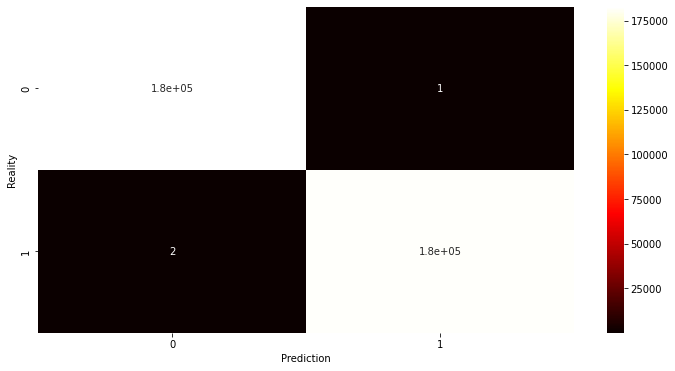

In [ ]:
plt.figure(figsize = (12, 6))

sns.heatmap(confusion_matrix_xgb_model, annot = True, cmap = "hot")
plt.xlabel("Prediction")
plt.ylabel("Reality")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_xgb, digits=6))

              precision    recall  f1-score   support

         0.0   0.999989  0.999995  0.999992    182917
         1.0   0.999995  0.999989  0.999992    182122

    accuracy                       0.999992    365039
   macro avg   0.999992  0.999992  0.999992    365039
weighted avg   0.999992  0.999992  0.999992    365039



In [ ]:
####  SHAP for XGBoost   #####

In [ ]:
from IPython.display import clear_output
!pip install shap
clear_output()

In [ ]:
feature_names=list(X.columns)

In [ ]:
import shap
xgb_explainer = shap.KernelExplainer(xgb_imb_model.predict,shap.sample(X_test, 5))
xgb_shap_values = xgb_explainer.shap_values(X_test)

  0%|          | 0/365039 [00:00<?, ?it/s]

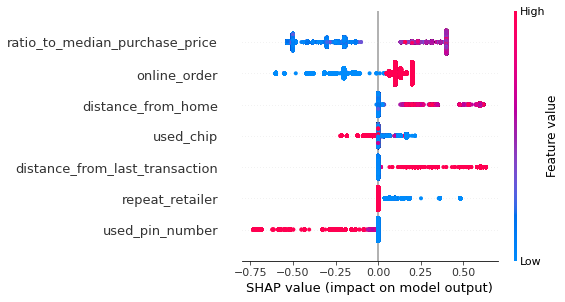

In [ ]:
shap.summary_plot(xgb_shap_values, X_test,feature_names)

In [ ]:
#####   Decision Tree    #####

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_test_dt = dt_model.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.5f}'.format(dt_model.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.99999


In [ ]:
## K Fold Cross Validation for Decision Tree ##
from sklearn.model_selection import KFold
kfold_validation=KFold(10)

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(dt_model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.99994 0.99999 1.      0.99999 0.99996 1.      0.99998 1.      1.
 1.     ]
0.999986


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_dt_model = confusion_matrix(y_test, y_test_dt)
print(confusion_matrix_dt_model)

[[182917      0]
 [     4 182118]]


Text(87.0, 0.5, 'Reality')

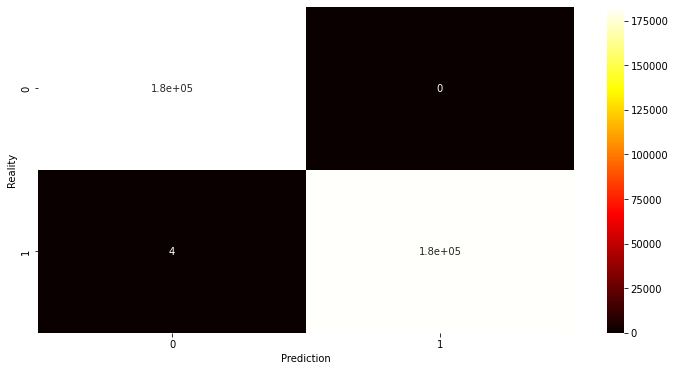

In [ ]:
plt.figure(figsize = (12, 6))

sns.heatmap(confusion_matrix_dt_model, annot = True, cmap = "hot")
plt.xlabel("Prediction")
plt.ylabel("Reality")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_dt, digits=6))

              precision    recall  f1-score   support

         0.0   0.999978  1.000000  0.999989    182917
         1.0   1.000000  0.999978  0.999989    182122

    accuracy                       0.999989    365039
   macro avg   0.999989  0.999989  0.999989    365039
weighted avg   0.999989  0.999989  0.999989    365039



In [ ]:
####  SHAP for Decision Tree   #####

In [ ]:
from IPython.display import clear_output
!pip install shap
clear_output()

In [ ]:
feature_names=list(X.columns)

In [ ]:
import shap
dt_explainer = shap.KernelExplainer(dt_model.predict,shap.sample(X_test, 5))
dt_shap_values = dt_explainer.shap_values(X_test)

  0%|          | 0/365039 [00:00<?, ?it/s]

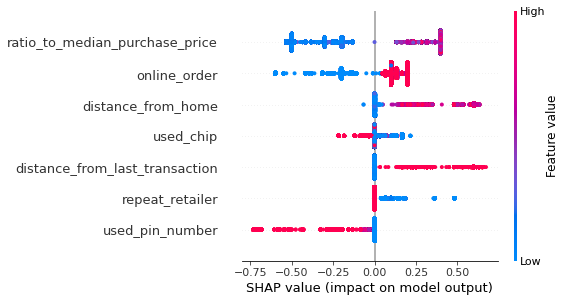

In [ ]:
shap.summary_plot(dt_shap_values, X_test,feature_names)

In [ ]:
####  Random Forest    ####

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_test_rf = rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.5f}'.format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.99999


In [ ]:
## K Fold Cross Validation for Random Forest ##
from sklearn.model_selection import KFold
kfold_validation=KFold(10)

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(rf,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.99997 1.      1.      0.99999 0.99999 1.      0.99998 1.      1.
 0.99999]
0.999992


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_rf = confusion_matrix(y_test, y_test_rf)
print(confusion_matrix_rf)

[[182917      0]
 [     2 182120]]


Text(87.0, 0.5, 'Reality')

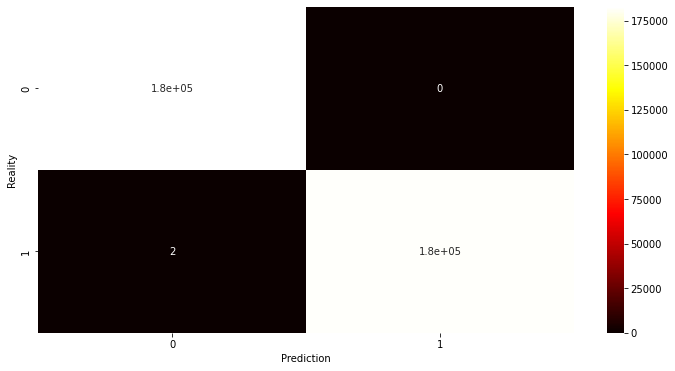

In [ ]:
plt.figure(figsize = (12, 6))

sns.heatmap(confusion_matrix_rf, annot = True, cmap = "hot")
plt.xlabel("Prediction")
plt.ylabel("Reality")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_rf, digits=6))

              precision    recall  f1-score   support

         0.0   0.999989  1.000000  0.999995    182917
         1.0   1.000000  0.999989  0.999995    182122

    accuracy                       0.999995    365039
   macro avg   0.999995  0.999995  0.999995    365039
weighted avg   0.999995  0.999995  0.999995    365039



In [ ]:
####  SHAP for Random Forest   #####

In [ ]:
from IPython.display import clear_output
!pip install shap
clear_output()

In [ ]:
feature_names=list(X.columns)

In [ ]:
import shap
rf_explainer = shap.KernelExplainer(rf.predict,shap.sample(X_test, 5))
rf_shap_values = rf_explainer.shap_values(X_test)

  0%|          | 0/365039 [00:00<?, ?it/s]

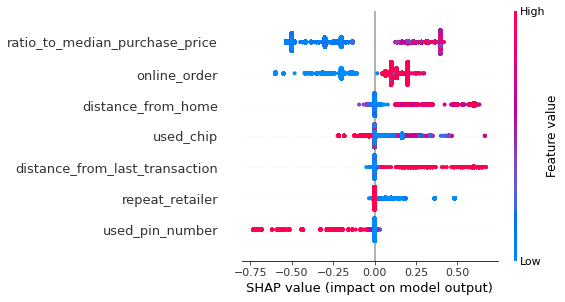

In [ ]:
shap.summary_plot(rf_shap_values, X_test,feature_names)

In [ ]:
####    AdaBoost    ####

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators = 100, random_state = 0)
adb.fit(X_train, y_train)
y_test_adb = adb.predict(X_test)
print('Accuracy of Ada Boost classifier on test set: {:.5f}'.format(adb.score(X_test, y_test)))

Accuracy of Ada Boost classifier on test set: 0.99985


In [ ]:
## K Fold Cross Validation for Ada Boost ##
from sklearn.model_selection import KFold
kfold_validation=KFold(10)

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(adb,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.99992 0.9999  0.99992 0.99995 0.99994 0.99988 0.99992 0.99989 0.99993
 0.99993]
0.9999179999999999


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_adb= confusion_matrix(y_test, y_test_adb)
print(confusion_matrix_adb)

[[182898     19]
 [    36 182086]]


Text(87.0, 0.5, 'Reality')

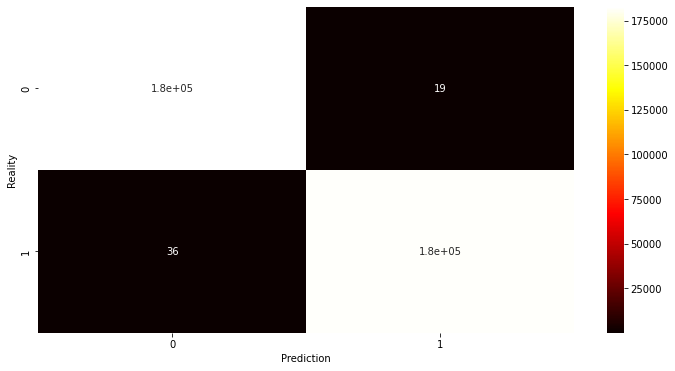

In [ ]:
plt.figure(figsize = (12, 6))

sns.heatmap(confusion_matrix_adb, annot = True, cmap = "hot")
plt.xlabel("Prediction")
plt.ylabel("Reality")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_adb, digits=6))

              precision    recall  f1-score   support

         0.0   0.999803  0.999896  0.999850    182917
         1.0   0.999896  0.999802  0.999849    182122

    accuracy                       0.999849    365039
   macro avg   0.999849  0.999849  0.999849    365039
weighted avg   0.999849  0.999849  0.999849    365039



In [ ]:
####  SHAP for Ada Boost   #####

In [ ]:
from IPython.display import clear_output
!pip install shap
clear_output()

In [ ]:
feature_names=list(X.columns)

In [ ]:
import shap
adb_explainer = shap.KernelExplainer(adb.predict,shap.sample(X_test, 5))
adb_shap_values = adb_explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(adb_shap_values, X_test,feature_names)